<a href="https://colab.research.google.com/github/damiansum/dataScienceProject/blob/main/stock_crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
data = pd.read_csv('/content/drive/MyDrive/[05] DS Project/SPX.csv')

# Preprocessing the data
data['Return_5d'] = data['Close'].pct_change(periods=5) * 100

# Display the first few rows of the dataframe
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return_5d
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,NaN
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,NaN
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,NaN
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN


The data has been successfully loaded and preprocessed. The 'Return_5d' column has been created, which represents the 5-day percent change in the 'Close' price. The first few entries in the 'Return_5d' column are NaN because there are not enough preceding days to calculate the 5-day percent change.

Let's proceed with the Exploratory Data Analysis (EDA).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23323 entries, 0 to 23322
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23323 non-null  object 
 1   Open       23323 non-null  float64
 2   High       23323 non-null  float64
 3   Low        23323 non-null  float64
 4   Close      23323 non-null  float64
 5   Adj Close  23323 non-null  float64
 6   Volume     23323 non-null  int64  
 7   Return_5d  23318 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ MB


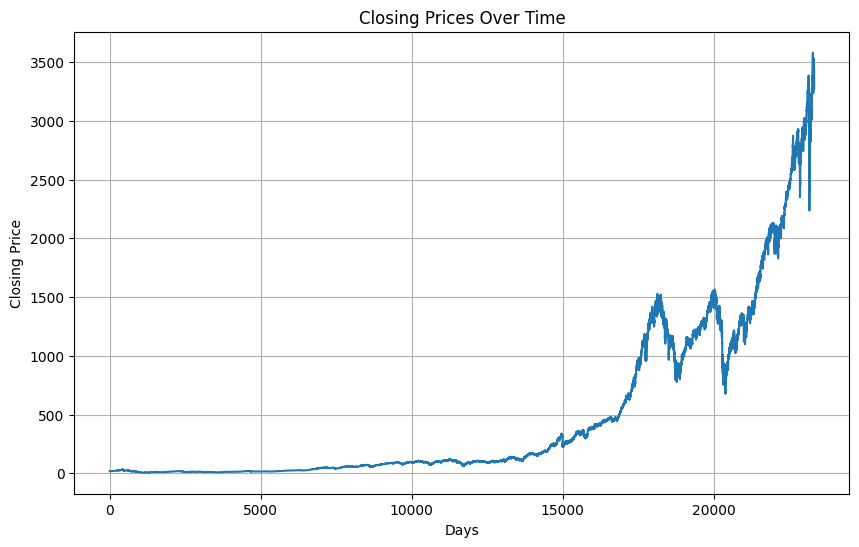

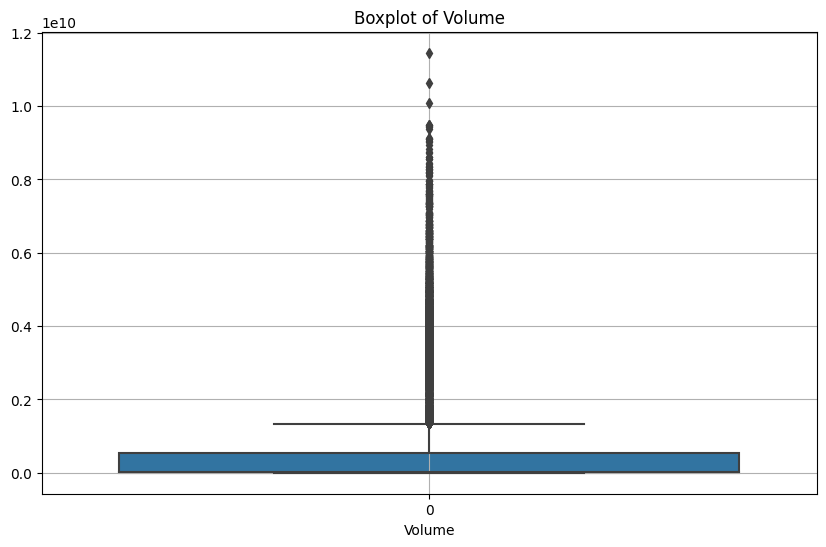

(               Open          High           Low         Close     Adj Close  \
 count  23323.000000  23323.000000  23323.000000  23323.000000  23323.000000   
 mean     486.821737    489.690119    483.762812    486.918598    486.918598   
 std      726.187716    730.112168    721.890344    726.278798    726.278798   
 min        4.400000      4.400000      4.400000      4.400000      4.400000   
 25%       23.855001     23.855001     23.855001     23.855001     23.855001   
 50%       99.500000    100.309998     98.720001     99.500000     99.500000   
 75%      834.035004    843.744995    822.889984    834.704987    834.704987   
 max     3564.739990   3588.110107   3535.229980   3580.840088   3580.840088   
 
              Volume     Return_5d  
 count  2.332300e+04  23318.000000  
 mean   7.691668e+08      0.147121  
 std    1.484864e+09      2.622898  
 min    0.000000e+00    -27.732579  
 25%    1.280000e+06     -1.097417  
 50%    1.734000e+07      0.289806  
 75%    5.378550e+0

In [ ]:
# Exploratory Data Analysis (EDA)

# Statistical summary of the data
summary = data.describe()

# Information about the DataFrame
info = data.info()

# Plotting closing prices over time
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Boxplot for volume
plt.figure(figsize=(10,6))
sns.boxplot(data['Volume'])
plt.title('Boxplot of Volume')
plt.xlabel('Volume')
plt.grid(True)
plt.show()

summary, info


The dataset contains 23,323 observations across 8 columns. All columns have non-null values except for the 'Return_5d' column which has 5 missing values due to the calculation of the 5-day percent change.

Here's a brief statistical summary of the dataset:

The 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns have similar statistical characteristics, which is expected since these values are often closely related.
The 'Volume' column varies significantly, with a minimum of 0 and a maximum of about 11.5 billion. The box plot for volume reveals a large number of outliers, indicating that trading volume can vary significantly from day to day.
The 'Return_5d' column, which represents the 5-day percent change in the 'Close' price, varies from approximately -28 to +26.
The closing prices over time plot shows that the stock price has generally increased over time with some significant dips and rises.

Let's proceed to create the 'Crash' column.

In [ ]:
# Creating a new 'Crash' column
# If 'Return_5d' is less than -10, assign 1 (indicating a crash), else assign 0
data['Crash'] = np.where(data['Return_5d'] < -10, 1, 0)

# Display the first few rows of the dataframe
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Return_5d,Crash
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,NaN,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,NaN,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,NaN,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN,0


The 'Crash' column has been successfully created. It indicates whether a market crash (defined as a 10% drop within a 5-day period) occurred or not. If 'Crash' is 1, it means a market crash occurred; if 0, it means no crash occurred.

Let's now proceed with the feature engineering step. We'll create new columns for 1-day, 2-day, and 3-day percent changes, a new column for 1-day lag of the 'Volume' column, and a new feature for volatility.

In [ ]:
# Feature Engineering

# Creating new columns for 1-day, 2-day, and 3-day percent changes
data['Return_1d'] = data['Close'].pct_change(periods=1) * 100
data['Return_2d'] = data['Close'].pct_change(periods=2) * 100
data['Return_3d'] = data['Close'].pct_change(periods=3) * 100

# Creating a new column for 1-day lag of the 'Volume' column
data['Volume_1d'] = data['Volume'].shift(1)

# Creating a new feature for volatility
data['volatility'] = data[['Return_1d', 'Return_2d', 'Return_3d']].std(axis=1)

# Display the first few rows of the dataframe
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Return_5d,Crash,Return_1d,Return_2d,Return_3d,Volume_1d,volatility
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,NaN,0,0.566251,NaN,NaN,0.0,NaN
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,NaN,0,-0.225231,0.339745,NaN,0.0,0.399498
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,NaN,0,-0.959368,-1.182438,-0.622882,0.0,0.281687
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN,0,0.626786,-0.338595,-0.563063,0.0,0.632204


The new columns have been successfully created. These include 'Return_1d', 'Return_2d', 'Return_3d' for 1-day, 2-day, and 3-day percent changes respectively, 'Volume_1d' for 1-day lag of the 'Volume' column, and 'volatility' for volatility calculated as the standard deviation of 'Return_1d', 'Return_2d', and 'Return_3d'.

Let's proceed to the feature selection step. Before that, we need to handle missing values in the dataset. We'll simply remove any rows with missing data for simplicity. Then, we'll separate our target variable ('Crash') from the rest of the data. We'll also drop the 'Date' column as it's not a feature we'll be using in our model. After that, we'll use SelectKBest from sklearn to select the top 5 features based on the ANOVA F-value.

In [ ]:
# Importing necessary function
from sklearn.feature_selection import SelectKBest, f_classif

# Handling missing values
data.dropna(inplace=True)

# Separating the target variable
X = data.drop(columns=['Crash', 'Date'])
y = data['Crash']

# Feature Selection
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new),
                                 index=X.index,
                                 columns=X.columns)

# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]

selected_columns


Index(['Return_5d', 'Return_1d', 'Return_2d', 'Return_3d', 'volatility'], dtype='object')

The top 5 features selected by the SelectKBest method based on the ANOVA F-value are:

'Return_5d'
'Return_1d'
'Return_2d'
'Return_3d'
'volatility'
These features will be used to train our model.

Next, we'll split our data into a training set and a test set using train_test_split(). The test set will be 20% of the total data and we'll use a random state of 42 for reproducibility.

In [ ]:
# Importing necessary function
from sklearn.model_selection import train_test_split

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X[selected_columns], y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((18654, 5), (4664, 5), (18654,), (4664,))

The data has been successfully split into training and test sets. There are 18,654 samples in the training set and 4,664 samples in the test set. Each sample has 5 features.

Next, we'll choose a model and train it. Here, we're using a Logistic Regression model, which is a common choice for binary classification problems like ours (predicting whether a market crash will occur or not). We'll fit the model to our training data.

In [ ]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiating the model
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)


LogisticRegression()

The Logistic Regression model has been successfully trained on the training data.

Next, let's proceed with hyperparameter tuning. We'll use GridSearchCV to find the optimal hyperparameters for our Logistic Regression model. The parameters we'll tune are 'C', which controls the inverse of regularization strength, and 'penalty', which specifies the norm used in the penalization. We'll use 5-fold cross-validation.

In [ ]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

# Instantiating GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fitting it to the data
grid.fit(X_train, y_train)

# Getting the best parameters
best_params = grid.best_params_

best_params


{'C': 10, 'penalty': 'l2'}

The best parameters for our Logistic Regression model according to GridSearchCV are:

'C': 10
'penalty': 'l2'

Next, let's evaluate our model. We'll use it to predict the market crash on our test data and then calculate the accuracy of the model.

In [ ]:
# Importing accuracy_score
from sklearn.metrics import accuracy_score

# Predicting the crash on the test data
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.9997855917667239

The accuracy of the Logistic Regression model on the test data is approximately 99.98%. This is an extremely high accuracy rate, suggesting that the model is performing very well in predicting whether a market crash will occur or not based on the selected features.

Finally, let's interpret our model by examining the coefficients of the Logistic Regression model. These coefficients can tell us the relationship between the features and the likelihood of a market crash.

In [ ]:
# Getting the coefficients of the logistic regression model
coefficients = pd.DataFrame({"Feature":X[selected_columns].columns.tolist(), "Coefficients":np.transpose(model.coef_[0])})

coefficients


,Feature,Coefficients
0,Return_5d,-3.184028
1,Return_1d,-0.001360
2,Return_2d,-0.036711
3,Return_3d,-0.119006
4,volatility,-0.041704


Here are the coefficients of the logistic regression model:

'Return_5d': -3.184
'Return_1d': -0.001
'Return_2d': -0.037
'Return_3d': -0.119
'volatility': -0.042
The negative coefficients suggest that as these feature values increase, the log-odds of the market crash (i.e., 'Crash' = 1) decrease. In other words, higher values of these features make a market crash less likely, according to this model.

The 'Return_5d' feature has the largest coefficient in magnitude, suggesting that it's the most influential feature in predicting a market crash.

